In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import tri
import networkx as nx
import numba as nb

In [8]:
def crossiterate(L1, L2): return [(a, b) for a in L1 for b in L2 if a != b]
def glue(alofarraylike, L2=None): return np.vstack(alofarraylike) if L2 is None else np.vstack((alofarraylike, L2))

In [9]:
print(crossiterate([0,1,2,3],[0,1,2,3]))
print(glue(([0,1,2,3],[0,1,2,3],[0,1,2,3],[0,1,2,3])))
print(glue([0,1,2,3],[0,1,2,3]))

[(0, 1), (0, 2), (0, 3), (1, 0), (1, 2), (1, 3), (2, 0), (2, 1), (2, 3), (3, 0), (3, 1), (3, 2)]
[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[0 1 2 3]
 [0 1 2 3]]


- key: 1:n
- pos: 2:n
- pointkeys: 3:n

***Keys should be integers, and unique to each point.***

In [68]:
def point(keys, pos): return glue(keys,pos)
def triangle(keys, pointkeys): return glue(keys, pointkeys)
def points2seg(keys1, keys2): return glue(keys1, keys2)
def tri2seg(tris): return {tris[0][n] : {(tris[1+a][n], tris[1+a+b][n]) for a in range(2) for b in range(1, 3-a)} for n in range(tris.shape[1])}
def seg2tri(keys, seg1, seg2, seg3): return triangle(keys, np.array([np.fromiter((x for x in set(p)), int) for p in glue([seg1,seg2,seg3]).reshape(1,6)]).T)

In [69]:
print(seg2tri(tri2seg(np.array([[1,1,2,3]]).T)))
print(seg2tri([[1]], np.array([1,2]).T, np.array([1,3]).T,  np.array([3,2]).T))

{1: {(2, 3), (1, 2), (1, 3)}}
[[1]
 [1]
 [2]
 [3]]


In [5]:
def adjMatrix(edgeset): return nx.to_numpy_array(nx.from_edgelist(edgeset))

In [7]:
def getRandomPoints(n=100, rangex = 1., rangey = 1.): return point(np.arange(0,n), np.random.uniform([0,0], [rangex, rangey], [n,2]).T)


[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]]


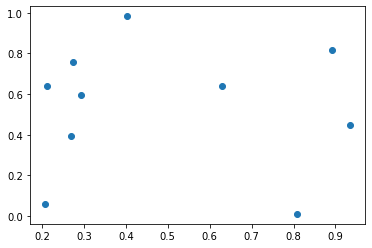

In [47]:
P = getRandomPoints(10)
L, K = P[1:], P[0]
plt.scatter(L[0], L[1])
E = np.array(crossiterate(K,K))
print(adjMatrix(E))

In [42]:
def sortPointsK(points): return points[:, points[0].argsort()]
def sortPointsX(points): return points[:, points[1].argsort()]
def sortPointsY(points): return points[:, points[2].argsort()]

In [46]:
print(P)
print(sortPointsK(P)[0])
print(sortPointsX(P)[0])
print(sortPointsY(P)[0])

[[0.         1.         2.         3.         4.         5.
  6.         7.         8.         9.        ]
 [0.81094183 0.57412525 0.28604699 0.53862022 0.95026029 0.09466916
  0.5763045  0.51044519 0.45151471 0.48673765]
 [0.18159905 0.04416524 0.03619638 0.54874784 0.03066822 0.63061545
  0.14436358 0.15601972 0.7830061  0.53422322]]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[5. 2. 8. 9. 7. 3. 1. 6. 0. 4.]
[4. 2. 1. 6. 7. 0. 9. 3. 5. 8.]


In [70]:
def genTri(x,y,isBottom): return ((x,y),(x+1,y),(x,y+1)) if isBottom else ((x,y+1),(x+1,y),(x+1,y+1))

def sqlattice(X,Y): return {genTri(x,y,isBottom) for x in range(X) for y in range(Y) for isBottom in range(2)}

In [71]:
print(sqlattice(5,8))

{((2, 8), (3, 7), (3, 8)), ((0, 1), (1, 1), (0, 2)), ((4, 3), (5, 3), (4, 4)), ((3, 4), (4, 4), (3, 5)), ((4, 5), (5, 4), (5, 5)), ((2, 6), (3, 6), (2, 7)), ((2, 6), (3, 5), (3, 6)), ((4, 4), (5, 3), (5, 4)), ((1, 3), (2, 2), (2, 3)), ((2, 0), (3, 0), (2, 1)), ((1, 1), (2, 1), (1, 2)), ((4, 2), (5, 2), (4, 3)), ((3, 5), (4, 4), (4, 5)), ((1, 5), (2, 5), (1, 6)), ((3, 5), (4, 5), (3, 6)), ((4, 1), (5, 0), (5, 1)), ((1, 6), (2, 5), (2, 6)), ((4, 5), (5, 5), (4, 6)), ((4, 7), (5, 6), (5, 7)), ((3, 1), (4, 0), (4, 1)), ((3, 6), (4, 6), (3, 7)), ((2, 3), (3, 2), (3, 3)), ((4, 4), (5, 4), (4, 5)), ((3, 2), (4, 2), (3, 3)), ((2, 5), (3, 5), (2, 6)), ((1, 4), (2, 3), (2, 4)), ((3, 4), (4, 3), (4, 4)), ((1, 4), (2, 4), (1, 5)), ((4, 2), (5, 1), (5, 2)), ((2, 2), (3, 1), (3, 2)), ((0, 2), (1, 1), (1, 2)), ((3, 8), (4, 7), (4, 8)), ((4, 7), (5, 7), (4, 8)), ((4, 6), (5, 5), (5, 6)), ((3, 7), (4, 6), (4, 7)), ((1, 0), (2, 0), (1, 1)), ((0, 1), (1, 0), (1, 1)), ((3, 7), (4, 7), (3, 8)), ((1, 1), (2